In [3]:
%cd ..

/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/HeartReconstruction


/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv

In [3]:
# 
mesh = pv.read('data/temporary/Final_models_01/Full_Heart_Mesh_6.vtk')
mesh['new array'] = np.full(mesh.n_points, 5)
# 
ranges = np.ptp(np.array(mesh.bounds).reshape(-1, 2), axis=1)
point = np.array(mesh.center) - ranges * 0.3

/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


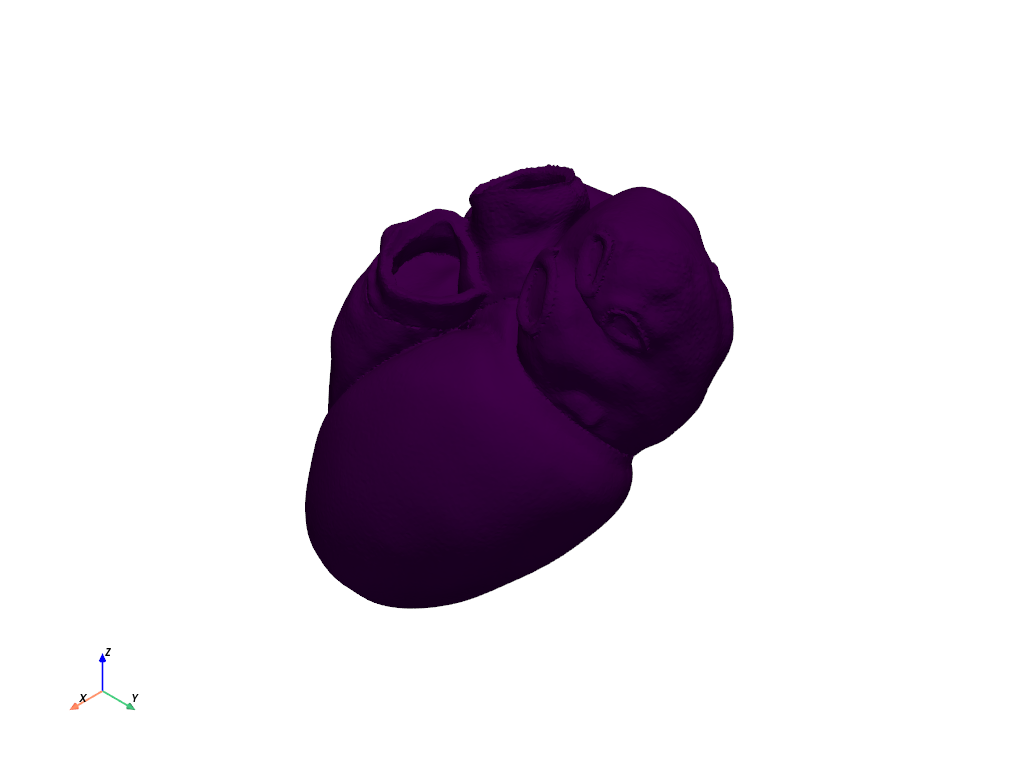

In [4]:
# plot the data with an automatically created Plotter
mesh.plot(show_scalar_bar=False, show_axes=True)

In [5]:
increment = np.pi / 6.0
# use a container to hold all the slices
slices = pv.MultiBlock()  # treat like a dictionary/list
for theta in np.arange(0, np.pi, increment):
    normal = np.array([np.cos(theta), np.sin(theta), 0.0]).dot(np.pi / 2.0)
    name = f'Bearing: {np.rad2deg(theta):.2f}'
    slices[name] = mesh.slice(origin=point, normal=normal)
slices

MultiBlock (0x78efa353a4a0)
  N Blocks    6
  X Bounds    -66.349, 51.059
  Y Bounds    -63.736, 43.881
  Z Bounds    -52.402, 67.572

/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


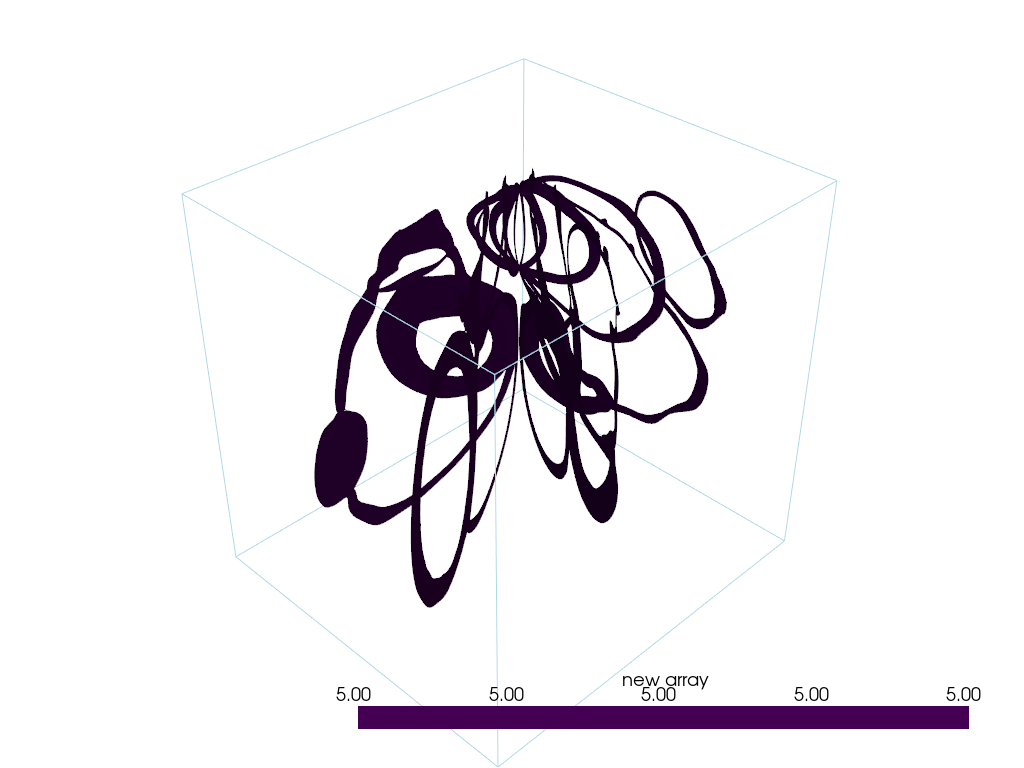

In [6]:
# define a categorical colormap
cmap = plt.get_cmap("viridis", 5)

p = pv.Plotter()
p.add_mesh(slices, cmap=cmap)
p.add_mesh(mesh.outline())
p.show()

In [55]:
# 
mesh = pv.read('data/real/HeartSegmented3D/Segmentation_LV.stl')  # 
mesh['new array'] = np.full(mesh.n_points, 5)
# 
ranges = np.ptp(np.array(mesh.bounds).reshape(-1, 2), axis=1)
point = np.array(mesh.center) - ranges * 0.01

In [56]:
ranges.shape, point.shape

((3,), (3,))

/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


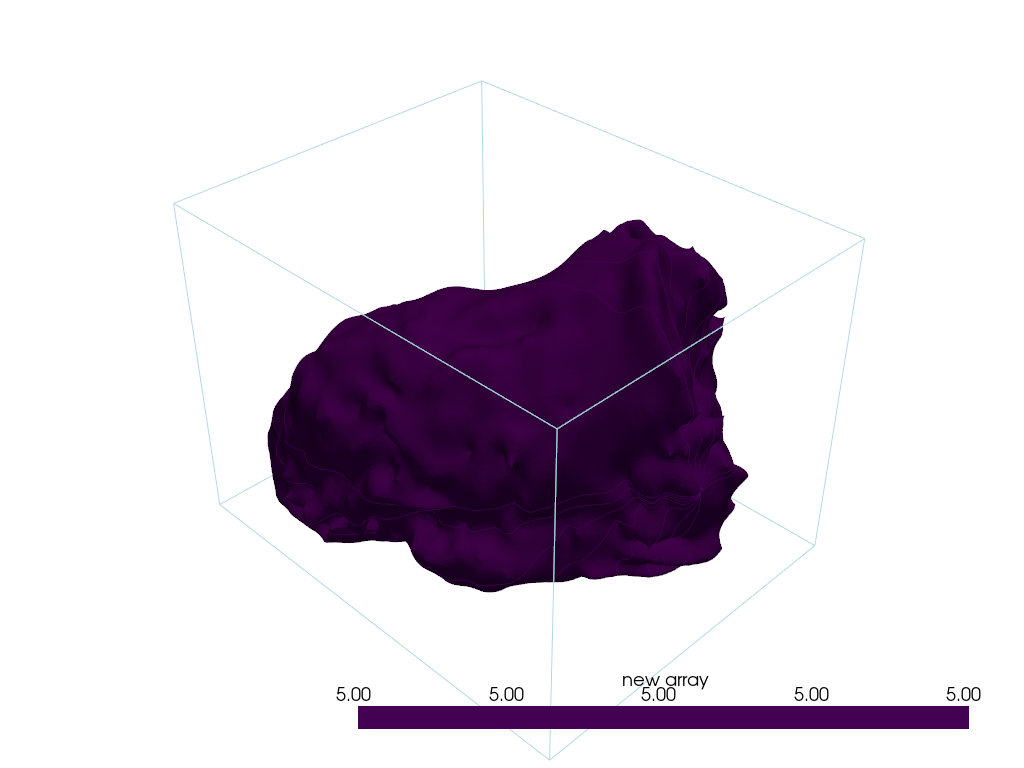

In [57]:
n_photo = 7
rotate_degree = 120
angle = np.pi / np.deg2rad(rotate_degree)
increment = np.pi / (np.deg2rad(rotate_degree) * n_photo)
# use a container to hold all the slices
slices = pv.MultiBlock()  # treat like a dictionary/list
# for theta in np.arange(0, np.pi, increment):
for theta in np.arange(0, angle, increment):
    # normal = np.array([np.cos(theta), np.sin(theta), 0.0]).dot(np.pi / 2.0)
    normal = np.array([np.cos(theta), 0.0, np.sin(theta)]).dot(np.pi / np.deg2rad(rotate_degree))
    name = f'Bearing: {np.rad2deg(theta):.2f}'
    slices[name] = mesh.slice(origin=point, normal=normal)

p = pv.Plotter()
p.add_mesh(slices)
p.add_mesh(mesh)
p.add_mesh(mesh.outline())
p.show()

In [58]:
len(slices)

7

/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


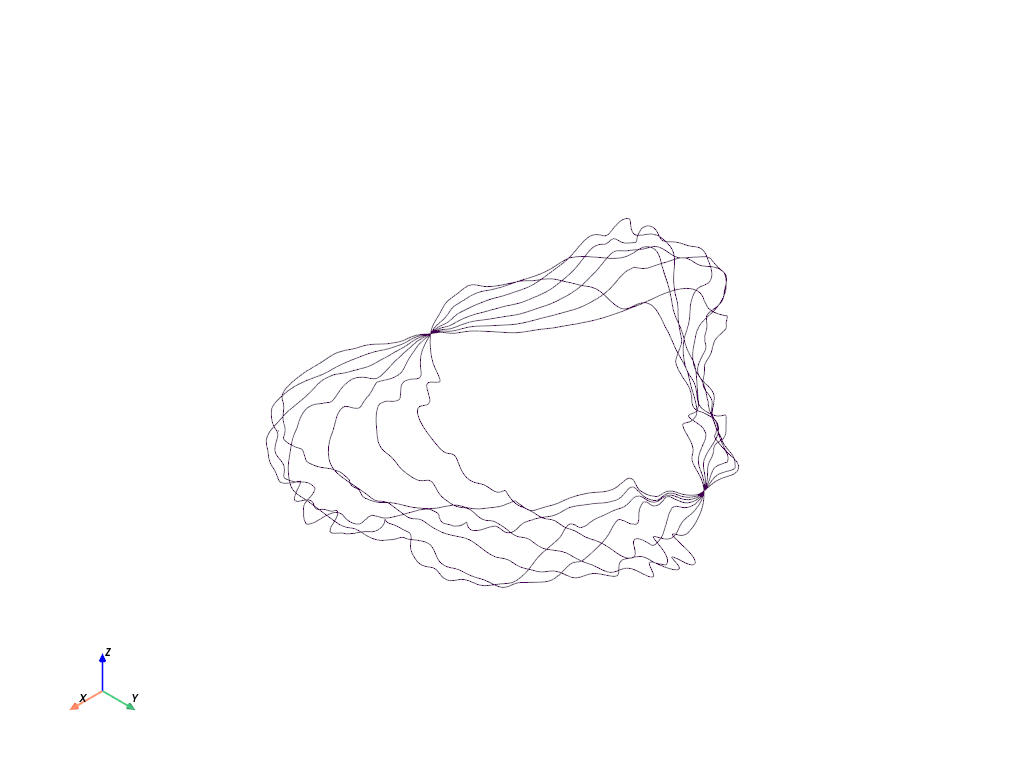

In [59]:
slices.plot(show_scalar_bar=False, show_axes=True)

In [60]:
#save the slices
for i, slc in enumerate(slices):
    p = pv.Plotter(off_screen=True, notebook=False)
    p.add_mesh(slices[i], color='Blue', opacity=1)
    p.view_zx(negative=False)
    p.show(screenshot=f'data/real/slices/rotate_yaxis/rot_yaxis_{i}.png')
    p.store_image = True
    p.close()

# WRONG

/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


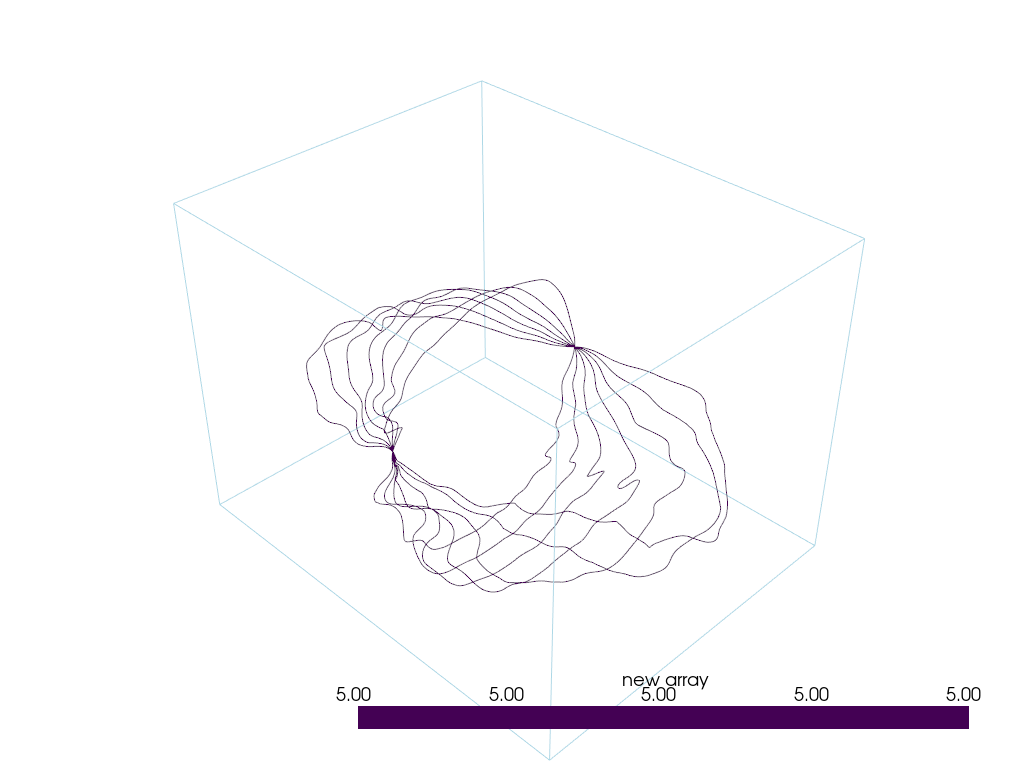

In [64]:
# use a container to hold all the slices
slices = pv.MultiBlock()  # treat like a dictionary/list
# for theta in np.arange(0, np.pi, increment):
for theta in np.arange(0, angle, increment):
    # normal = np.array([np.cos(theta), np.sin(theta), 0.0]).dot(np.pi / 2.0)
    normal = np.array([0.0, np.cos(theta), np.sin(theta)]).dot(np.pi / np.deg2rad(rotate_degree))
    name = f'Bearing: {np.rad2deg(theta):.2f}'
    slices[name] = mesh.slice(origin=point, normal=normal)

p = pv.Plotter()
p.add_mesh(slices)
p.add_mesh(mesh.outline())
p.show()

In [65]:
#save the slices
for i, slc in enumerate(slices):
    p = pv.Plotter(off_screen=True, notebook=False)
    p.add_mesh(slices[i], color='Blue', opacity=1)
    p.view_zx(negative=False)
    p.show(screenshot=f'data/real/slices/rotate_xaxis/rot_xaxis_{i}.png')
    p.store_image = True
    p.close()

/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


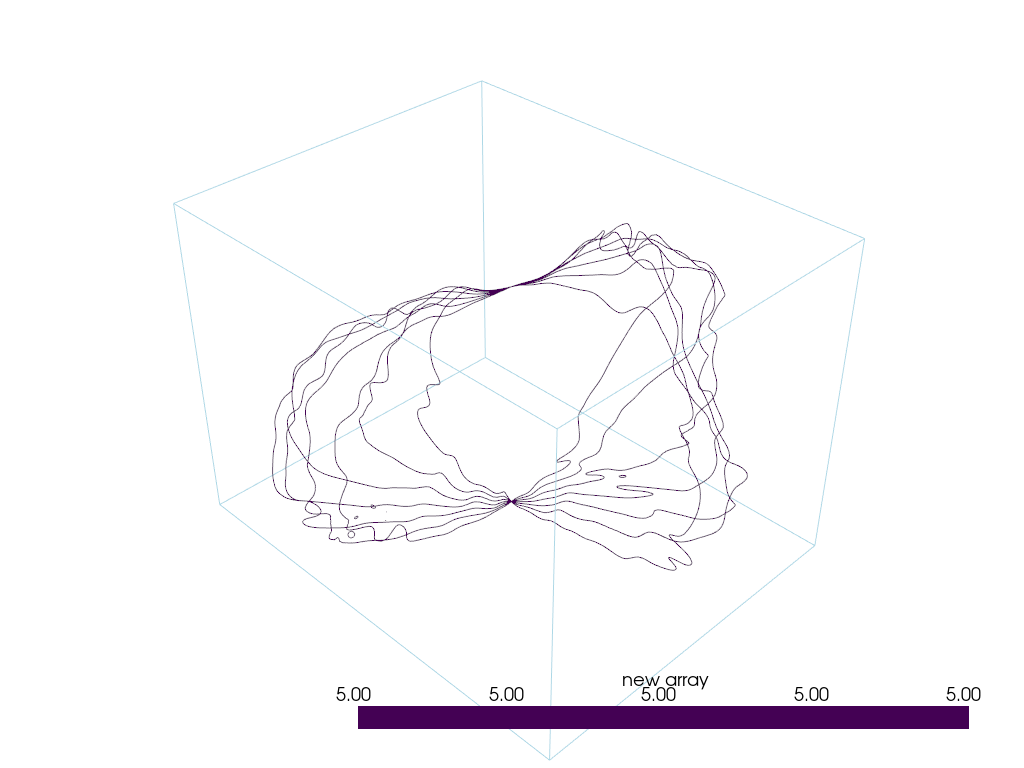

In [66]:
# use a container to hold all the slices
slices = pv.MultiBlock()  # treat like a dictionary/list
# for theta in np.arange(0, np.pi, increment):
for theta in np.arange(0, angle, increment):
    normal = np.array([np.cos(theta), np.sin(theta), 0.0]).dot(np.pi / np.deg2rad(rotate_degree))
    name = f'Bearing: {np.rad2deg(theta):.2f}'
    slices[name] = mesh.slice(origin=point, normal=normal)

p = pv.Plotter()
p.add_mesh(slices)
p.add_mesh(mesh.outline())
p.show()

In [67]:
#save the slices
for i, slc in enumerate(slices):
    p = pv.Plotter(off_screen=True, notebook=False)
    p.add_mesh(slices[i], color='Blue', opacity=1)
    p.view_zx(negative=False)
    p.show(screenshot=f'data/real/slices/rotate_zaxis/rot_zaxis_{i}.png')
    p.store_image = True
    p.close()

In [17]:
import matplotlib.pyplot as plt
import pyvista as pv
import numpy as np
from pyvista import examples


def slice_ortho(mesh, x=None, y=None, z=None, scalars=None,
                fig=None):
    mesh.set_active_scalar(scalars)
    # order: YZ, XZ, XY
    slices = mesh.ctp().slice_orthogonal(x=x, y=y, z=z, 
                                   generate_triangles=True, 
                                   contour=False)
    
    p = pv.Plotter(off_screen=True, notebook=False)
    p.add_mesh(slices)
    _, perspective = p.show(screenshot=True)
    
    def plot_mpl(ax, slc, u, v):
        pts = slc.points
        tri = slc.faces.reshape((-1,4))[:, 1:]
        val = slc.active_scalar
        
        ax.tricontourf(pts[:,u], pts[:,v], tri, val)
        return
        
    axii = [(1,2), (0,2), (0,1)]
    
    if fig is None:
        fig = plt.figure()
    
    ax1 = fig.add_subplot(2, 2, 1)
    #ax1.set_aspect('equal')
    ax2 = fig.add_subplot(2, 2, 2, sharey=ax1)
    ax3 = fig.add_subplot(2, 2, 3, sharex=ax1)
    plts = [ax1, ax2, ax3]

    for i, slc in enumerate(slices):
        plot_mpl(plts[i], slc, *axii[i])
        
    ax4 = fig.add_subplot(2, 2, 4, )
    ax4.imshow(perspective)
    ax4.get_xaxis().set_visible(False)
    ax4.get_yaxis().set_visible(False)
        
    return fig


# mesh = examples.load_channels()
mesh = pv.read('data/real/HeartSegmented3D/Segmentation_LV.stl')  # 
fig = plt.figure(figsize=(10,6))
slice_ortho(mesh, fig=fig)
plt.tight_layout()
plt.show()

AttributeError: 'PolyData' object has no attribute 'set_active_scalar'

<Figure size 1000x600 with 0 Axes>

## Rotate around y axis

/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


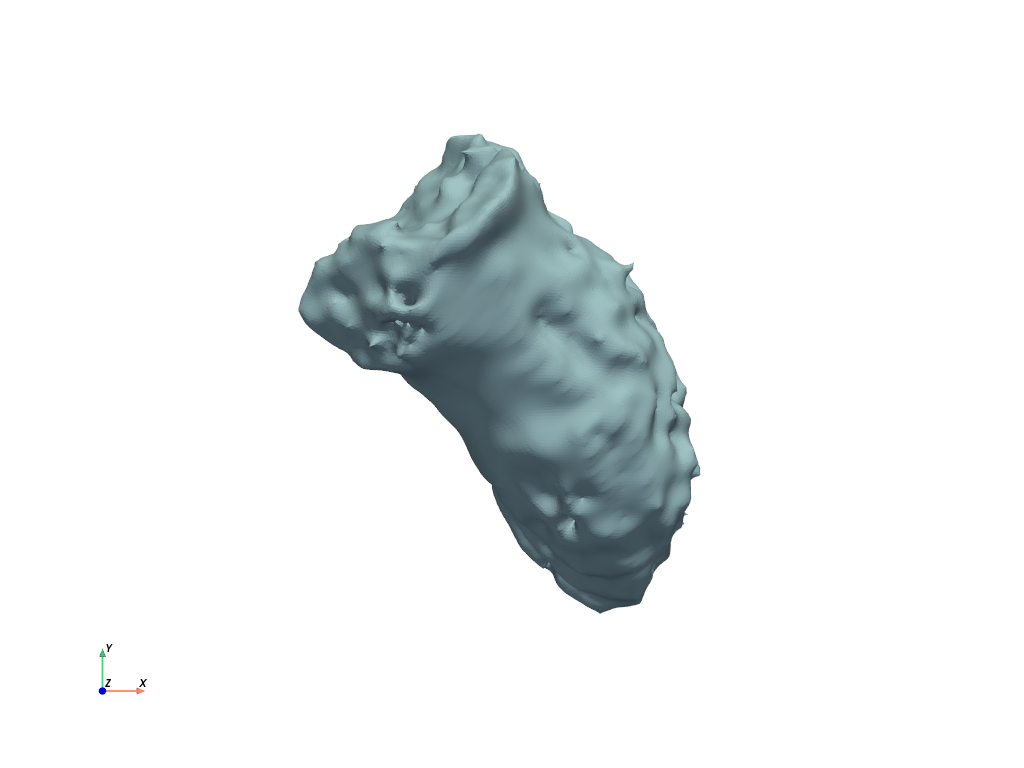

/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/suetin/Projects/VSCode/UltrasoundCardiacReconstruction/.venv/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


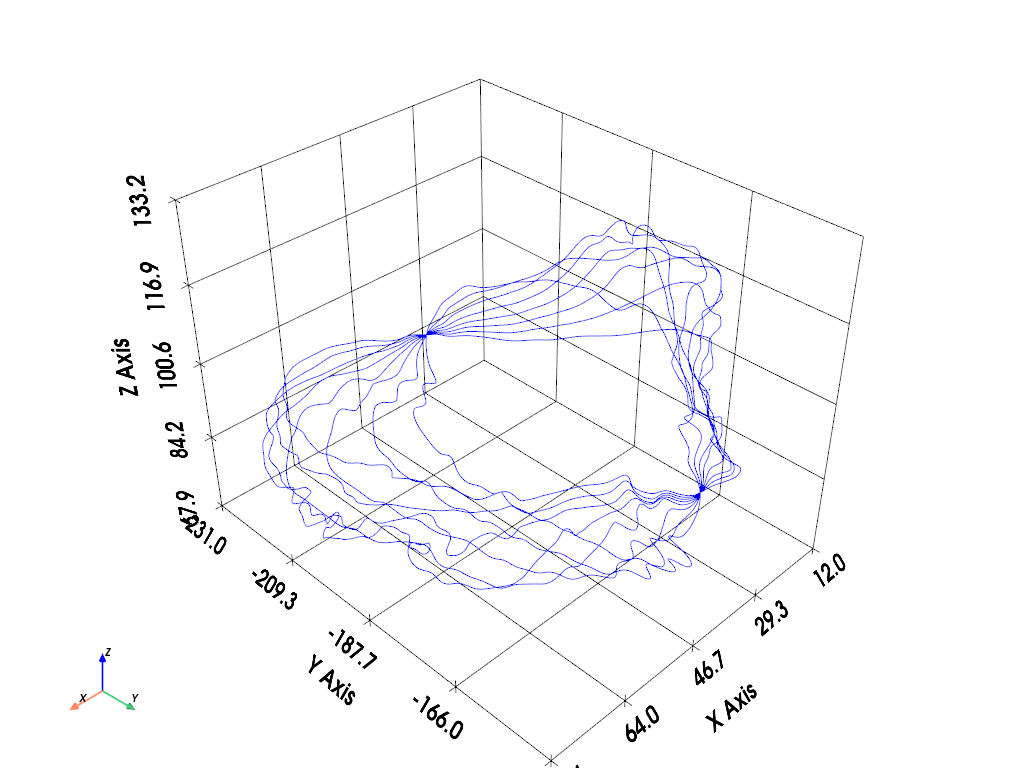

In [ ]:
mesh = pv.read('data/real/HeartSegmented3D/Segmentation_LV.stl') 

cpos = mesh.plot(cpos="xy", show_edges=False)

# get slices of the mesh
# zslices = mesh.slice_along_axis(n=7, axis='z')
zslices = slices.copy()
zslices.plot(color='blue', opacity=1, show_grid=True)


#save the slices
for i, slc in enumerate(zslices):
    p = pv.Plotter(off_screen=True, notebook=False)
    p.add_mesh(zslices[i], color='white', opacity=1)
    p.view_zx(negative=False)
    # p.show(screenshot='C:/Users/vmeline/Desktop/New folder/slice_%d.png' % i)
    p.store_image = True
    p.close()

In [ ]:
mesh

PolyData,Information
N Cells,110208
N Points,55135
N Strips,0
X Bounds,"1.106e+01, 8.248e+01"
Y Bounds,"-2.324e+02, -1.442e+02"
Z Bounds,"6.788e+01, 1.332e+02"
N Arrays,0


In [ ]:
arr = pv.get_array(slices, "new")
arr

AttributeError: 'MultiBlock' object has no attribute 'GetPointData'

In [ ]:
type(arr)

NoneType

In [1]:
import cv2, os, re
from scipy.interpolate import RegularGridInterpolator

def open_image(path:'str'):
    assert os.path.exists(path)

    img = cv2.imread(path, 0)  # As gray
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256)) # img
    return img

In [5]:
input_image = []
# Concat images to depth
apical_paths = sorted(os.listdir('data/real/slices/rotate_xaxis'), key=lambda x: (int(re.sub('\D','',x)), x))
for path in apical_paths:
    path = os.path.join('data/real/slices/rotate_xaxis', path)
    input_image.append(open_image(path))

input_image = np.array(input_image)
input_image.shape

(7, 256, 256)

In [6]:
pixelsize_old = 1
slice_thickness_old = 20

pixelsize_new = 1
slice_thickness_new = 10

x_old = np.linspace(0, (input_image.shape[1]-1)*pixelsize_old, input_image.shape[1])
y_old = np.linspace(0, (input_image.shape[2]-1)*pixelsize_old, input_image.shape[2])
z_old = np.arange(0, (input_image.shape[0]))*slice_thickness_old

In [75]:
method = "linear"  #   "linear"  "cubic"

my_interpolating_object = RegularGridInterpolator((z_old, x_old, y_old), input_image, method=method, bounds_error=False)

x_new = np.round(input_image.shape[1]*pixelsize_old/pixelsize_new).astype('int')
y_new = np.round(input_image.shape[2]*pixelsize_old/pixelsize_new).astype('int')
z_new = np.arange(z_old[0], z_old[-1], slice_thickness_new)

# pts is the new grid
pts = np.indices((len(z_new), x_new, y_new)).transpose((1, 2, 3, 0))
pts = pts.reshape(1, len(z_new)*x_new*y_new, 1, 3).reshape(len(z_new)*x_new*y_new, 3)
pts = np.array(pts, dtype=float)
pts[:, 1:3] = pts[:, 1:3]*pixelsize_new
pts[:, 0] = pts[:, 0]*slice_thickness_new +z_new[0]

NameError: name 'RegularGridInterpolator' is not defined

In [ ]:
print("Total z slices = ", pts.shape[0]/(input_image.shape[1]*input_image.shape[2]))

In [ ]:
# Interpolate
interpolated_data = my_interpolating_object(pts)
interpolated_data = interpolated_data.reshape(len(z_new), x_new, y_new)

interpolated_data.shape

In [ ]:
interpolated_data_16bit = (np.round(((interpolated_data - interpolated_data.min())/(interpolated_data.max() - interpolated_data.min())) * 255.0)).astype(np.uint8)

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from skimage import measure
from skimage.draw import ellipsoid


fps = 5

In [ ]:
# Use marching cubes to obtain the surface mesh of these ellipsoids
verts, faces, normals, values = measure.marching_cubes(interpolated_data_16bit, 0)

In [ ]:
# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

plt.tight_layout()
plt.show()

In [ ]:
from notebooks.utils import interpolate